# Concrete Compressive Strength Dataset

In [11]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_excel('C:/Users/emnsrjm/Desktop/Courses/Machine Learning/Project/Project/Machine-Learning-Project/regression-models/Concrete Compressive Strength/data/Concrete_Data.xls',header=1)
data = pd.DataFrame(dataset)

X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values

print(data)
print(X.shape)
print(Y.shape)

        540      0    0.1    162   2.5    1040    676   28  79.98611076
0     540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28    61.887366
1     332.5  142.5    0.0  228.0   0.0   932.0  594.0  270    40.269535
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  365    41.052780
3     198.6  132.4    0.0  192.0   0.0   978.4  825.5  360    44.296075
4     266.0  114.0    0.0  228.0   0.0   932.0  670.0   90    47.029847
5     380.0   95.0    0.0  228.0   0.0   932.0  594.0  365    43.698299
6     380.0   95.0    0.0  228.0   0.0   932.0  594.0   28    36.447770
7     266.0  114.0    0.0  228.0   0.0   932.0  670.0   28    45.854291
8     475.0    0.0    0.0  228.0   0.0   932.0  594.0   28    39.289790
9     198.6  132.4    0.0  192.0   0.0   978.4  825.5   90    38.074244
10    198.6  132.4    0.0  192.0   0.0   978.4  825.5   28    28.021684
11    427.5   47.5    0.0  228.0   0.0   932.0  594.0  270    43.012960
12    190.0  190.0    0.0  228.0   0.0   932.0  670.0   90    42

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
540            1029 non-null float64
0              1029 non-null float64
0.1            1029 non-null float64
162            1029 non-null float64
2.5            1029 non-null float64
1040           1029 non-null float64
676            1029 non-null float64
28             1029 non-null int64
79.98611076    1029 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.4 KB


In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [15]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression()]

accuracy= np.zeros(6)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 59.58902614242375
Accuracy for DecisionTreeRegressor: 74.30629194558266
Accuracy for RandomForestRegressor: 49.67917016596436
Accuracy for AdaBoostRegressor: 76.9752544342238
Accuracy for GaussianProcessRegressor: 53.1543609557152
Accuracy for LinearRegression: 54.23514020323501


Text(0.5, 1.0, 'Concrete Compressive Strength Dataset model accuracy')

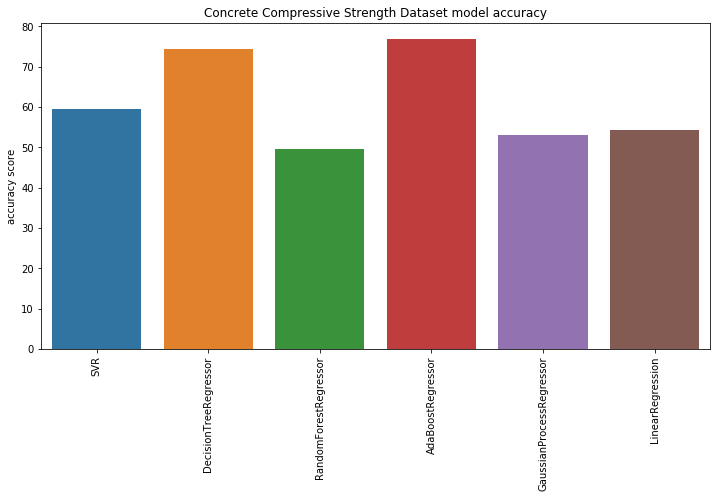

In [16]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Concrete Compressive Strength Dataset model accuracy')